In [468]:
import numpy as np 
import pandas as pd
import matplotlib as plt
import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup

In [469]:
df = pd.read_csv('/Users/jaimevazquez/Desktop/pgaTourData.csv')

In [470]:
# Cleaning Data

In [471]:
df = df.dropna(axis=0, subset=['Rounds'])

In [472]:
df_golf = df.rename(columns = {'Player Name': 'Player_Name', 'Fairway Percentage':'Fairway_Percentage', 'Avg Distance':'Avg_Distance', 'Average Putts':'Average_Putts', 'Average Scrambling': 'Average_Scrambling', 'Average Score':'Average_Score', 'Top 10':'Top_10', 'Average SG Putts':'Average_SG_Putts', 'Average SG Total': 'Average_SG_Total', 'SG:OTT': 'SG_OTT', 'SG:APR': 'SG_APR', 'SG:ARG':'SG_ARG'})

In [473]:
df_golf

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Phil Mickelson,76.0,52.66,2010,299.1,65.13,28.79,61.84,69.966,"1,629",1.0,5.0,-0.147,1.001,0.185,0.738,0.228,"3,821,733"
1674,John Daly,63.0,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,NaN,NaN,-0.653,-0.989,0.336,-0.374,-0.298,"158,587"
1675,Jimmy Walker,82.0,51.29,2010,292.9,65.88,29.14,58.46,70.953,554,NaN,2.0,0.252,0.093,-0.538,0.336,0.047,"937,987"
1676,Daniel Chopra,74.0,51.27,2010,295.9,61.64,28.88,56.16,72.194,142,NaN,NaN,0.361,-1.096,-0.307,-1.070,-0.084,"311,405"


In [474]:
# Replace NaN for 0 in Top_10 and make it an int
df_golf['Top_10'].fillna(0, inplace = True)
df_golf['Top_10'] = df_golf['Top_10'].astype(int)

In [475]:
# Replace NaN for 0 in Wins and make it an int
df_golf['Wins'].fillna(0, inplace = True)
df_golf['Wins'] = df_golf['Wins'].astype(int)

In [476]:
# Make Rounds an int
df_golf['Rounds'] = df_golf['Rounds'].astype(int)

In [477]:
# Make Points an int
df_golf.dropna(axis = 0, inplace = True )
df_golf['Points'] = df_golf['Points'].str.replace(',', '')
df_golf['Points'] = df_golf['Points'].astype(int)

In [478]:
# Perfect money column
df_golf['Money'] = df_golf['Money'].str.replace('$', '')
df_golf['Money'] = df_golf['Money'].str.replace(',', '')
df_golf['Money'] = df_golf['Money'].astype(int)

In [480]:
indexYears = df_golf[df_golf['Year'] <= 2016].index

In [481]:
df_golf.drop(indexYears , inplace=True)

In [483]:
df_golf 

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Harris English,84,49.80,2017,301.2,63.73,28.71,59.79,70.848,397,0,2,0.374,0.017,-0.644,0.138,0.169,864959
379,J.B. Holmes,83,49.75,2017,306.4,62.19,28.88,56.12,70.660,543,0,2,-0.032,0.521,0.533,0.039,0.137,1353584
380,Matt Every,76,48.41,2017,297.7,60.16,28.94,48.01,72.671,175,0,0,-0.272,-1.454,-0.734,-0.141,-0.306,351412
381,Andrew Loupe,55,45.93,2017,311.3,59.83,29.63,50.27,72.803,105,0,1,-0.242,-1.416,-0.348,-0.424,-0.403,273070


In [484]:
df_golf.corr(method = 'pearson')

,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money
Rounds,1.000000,0.096178,0.022152,0.145598,0.304078,0.010795,0.147070,-0.345654,0.375095,0.125912,0.400573,0.033003,0.317026,0.221764,0.276473,0.105040,0.301076
Fairway_Percentage,0.096178,1.000000,0.111276,-0.439460,0.381394,0.236871,0.230514,-0.189344,0.026938,-0.045935,0.048697,-0.039612,0.181384,0.237628,0.161663,-0.085005,0.009446
Year,0.022152,0.111276,1.000000,0.226611,0.186522,0.092460,-0.087525,-0.040506,0.029641,0.007024,0.031122,0.023346,0.028998,0.016834,0.009417,0.007282,0.037892
Avg_Distance,0.145598,-0.439460,0.226611,1.000000,0.359577,0.173347,-0.154406,-0.403167,0.409369,0.272563,0.389985,-0.123221,0.402398,0.643721,0.215262,-0.079841,0.415772
gir,0.304078,0.381394,0.186522,0.359577,1.000000,0.548651,0.129249,-0.600835,0.375015,0.187630,0.373561,-0.204436,0.577352,0.629901,0.593165,-0.019838,0.358602
Average_Putts,0.010795,0.236871,0.092460,0.173347,0.548651,1.000000,-0.450432,0.161003,-0.193433,-0.147710,-0.171583,-0.663268,-0.169504,0.313572,0.131752,-0.419566,-0.199834
Average_Scrambling,0.147070,0.230514,-0.087525,-0.154406,0.129249,-0.450432,1.000000,-0.544020,0.313745,0.112102,0.311153,0.366179,0.543458,0.099399,0.271340,0.607236,0.306073
Average_Score,-0.345654,-0.189344,-0.040506,-0.403167,-0.600835,0.161003,-0.544020,1.000000,-0.758952,-0.404509,-0.732059,-0.277791,-0.961917,-0.602422,-0.707785,-0.417551,-0.748177
Points,0.375095,0.026938,0.029641,0.409369,0.375015,-0.193433,0.313745,-0.758952,1.000000,0.780882,0.861735,0.204410,0.733906,0.477488,0.537391,0.312214,0.970333
Wins,0.125912,-0.045935,0.007024,0.272563,0.187630,-0.147710,0.112102,-0.404509,0.780882,1.000000,0.500958,0.100277,0.385460,0.269806,0.268201,0.167685,0.761538


In [485]:
# important correlations (in my golfing opinion)
'''
coor(Avg_Distance, Average_Score) = -0.403167
coor(Average_SG_Putts, Average_Score) = -0.277791
coor(SG_APR, Average_Score) = -0.707785
coor(SG_ARG, Average_Score) = -0.417551
'''

'\ncoor(Avg_Distance, Average_Score) = -0.403167\ncoor(Average_SG_Putts, Average_Score) = -0.277791\ncoor(SG_APR, Average_Score) = -0.707785\ncoor(SG_ARG, Average_Score) = -0.417551\n'

In [487]:
# Golfers who have been in top 10 at least 8 times
df_top_golfers = df_golf[df_golf['Money'] > 4500000]

In [488]:
df_top_golfers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 32 to 361
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player_Name         22 non-null     object 
 1   Rounds              22 non-null     int64  
 2   Fairway_Percentage  22 non-null     float64
 3   Year                22 non-null     int64  
 4   Avg_Distance        22 non-null     float64
 5   gir                 22 non-null     float64
 6   Average_Putts       22 non-null     float64
 7   Average_Scrambling  22 non-null     float64
 8   Average_Score       22 non-null     float64
 9   Points              22 non-null     int64  
 10  Wins                22 non-null     int64  
 11  Top_10              22 non-null     int64  
 12  Average_SG_Putts    22 non-null     float64
 13  Average_SG_Total    22 non-null     float64
 14  SG_OTT              22 non-null     float64
 15  SG_APR              22 non-null     float64
 16  SG_ARG  

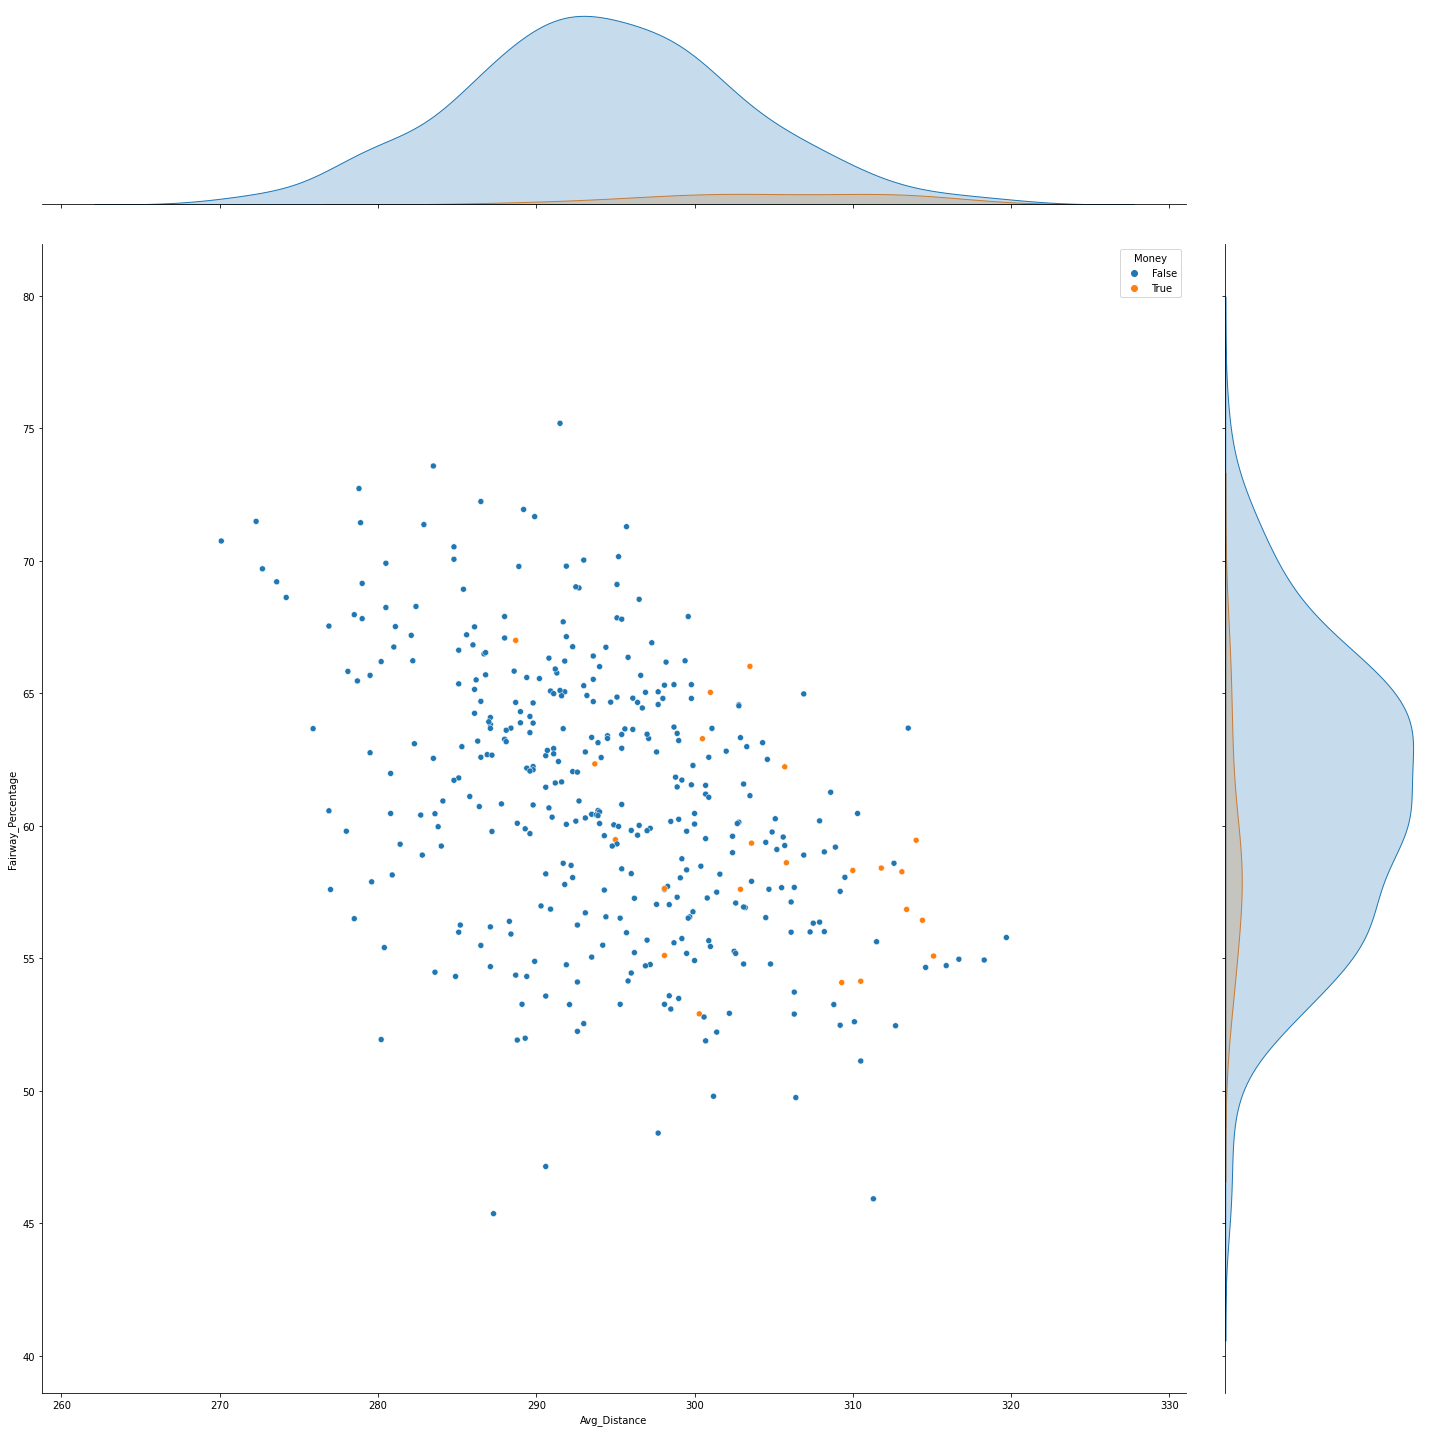

In [489]:
sns.jointplot(x= df_golf.Avg_Distance, y= df_golf.Fairway_Percentage, hue= df_golf.Money > 4500000, height= 20)

In [490]:
# coor(Fairway_Percentage, Avg_Distance) =

<AxesSubplot:ylabel='Avg_Distance'>

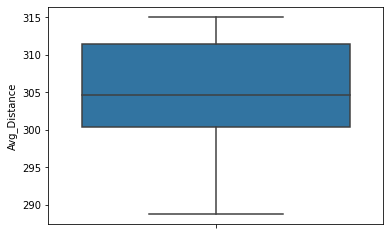

In [491]:
sns.boxplot(y = df_top_golfers.Avg_Distance)

<AxesSubplot:ylabel='Fairway_Percentage'>

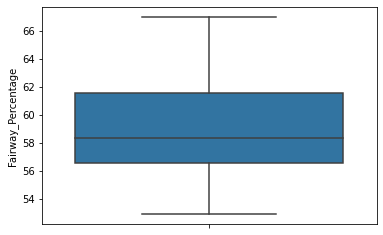

In [492]:
sns.boxplot(y= df_top_golfers.Fairway_Percentage)

In [493]:
# Longest Hitters

df_drivers = df_golf[['Year','Player_Name','Avg_Distance', 'Fairway_Percentage']].copy()
df_drivers.sort_values(by = 'Avg_Distance', inplace = True, ascending = False)
df_drivers.head()


,Year,Player_Name,Avg_Distance,Fairway_Percentage
162,2018,Rory McIlroy,319.7,55.79
174,2018,Trey Mullinax,318.3,54.94
350,2017,Rory McIlroy,316.7,54.97
179,2018,Tom Lovelady,315.9,54.73
173,2018,Tony Finau,315.1,55.09


In [494]:
df_driver_rank = df_drivers.reset_index()

In [495]:
df_driver_rank

,index,Year,Player_Name,Avg_Distance,Fairway_Percentage
0,162,2018,Rory McIlroy,319.7,55.79
1,174,2018,Trey Mullinax,318.3,54.94
2,350,2017,Rory McIlroy,316.7,54.97
3,179,2018,Tom Lovelady,315.9,54.73
4,173,2018,Tony Finau,315.1,55.09
...,...,...,...,...,...
377,204,2017,Ken Duke,274.2,68.62
378,201,2017,Søren Kjeldsen,273.6,69.21
379,200,2017,Zac Blair,272.7,69.70
380,195,2017,Brian Stuard,272.3,71.49


In [507]:
#df_golf['driver_rank'] = np.where(df_driver_rank[383 -'index'])
df_golf['driver_rank']= df_golf.index.map(df_driver_rank.set_index('index'))


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [502]:
df_golf

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money,driver_rank
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487,0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203,1
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018,2
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608,3
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Harris English,84,49.80,2017,301.2,63.73,28.71,59.79,70.848,397,0,2,0.374,0.017,-0.644,0.138,0.169,864959,377
379,J.B. Holmes,83,49.75,2017,306.4,62.19,28.88,56.12,70.660,543,0,2,-0.032,0.521,0.533,0.039,0.137,1353584,378
380,Matt Every,76,48.41,2017,297.7,60.16,28.94,48.01,72.671,175,0,0,-0.272,-1.454,-0.734,-0.141,-0.306,351412,379
381,Andrew Loupe,55,45.93,2017,311.3,59.83,29.63,50.27,72.803,105,0,1,-0.242,-1.416,-0.348,-0.424,-0.403,273070,380


In [497]:
# Line Readers (Putters)

best_putters = df_golf[['Year', 'Player_Name', 'Wins', 'Average_SG_Putts']].copy()
best_putters.sort_values(by = 'Average_SG_Putts', inplace = True, ascending = False)
best_putters.head(25)

,Year,Player_Name,Wins,Average_SG_Putts
251,2017,Rickie Fowler,1,0.852
268,2017,Michael Thompson,0,0.840
132,2018,Greg Chalmers,0,0.790
140,2018,Jason Day,2,0.770
96,2018,Alex Noren,0,0.758
180,2018,Daniel Summerhays,0,0.736
335,2017,Luke Donald,0,0.704
89,2018,Webb Simpson,1,0.692
108,2018,Beau Hossler,0,0.685
60,2018,Johnson Wagner,0,0.623


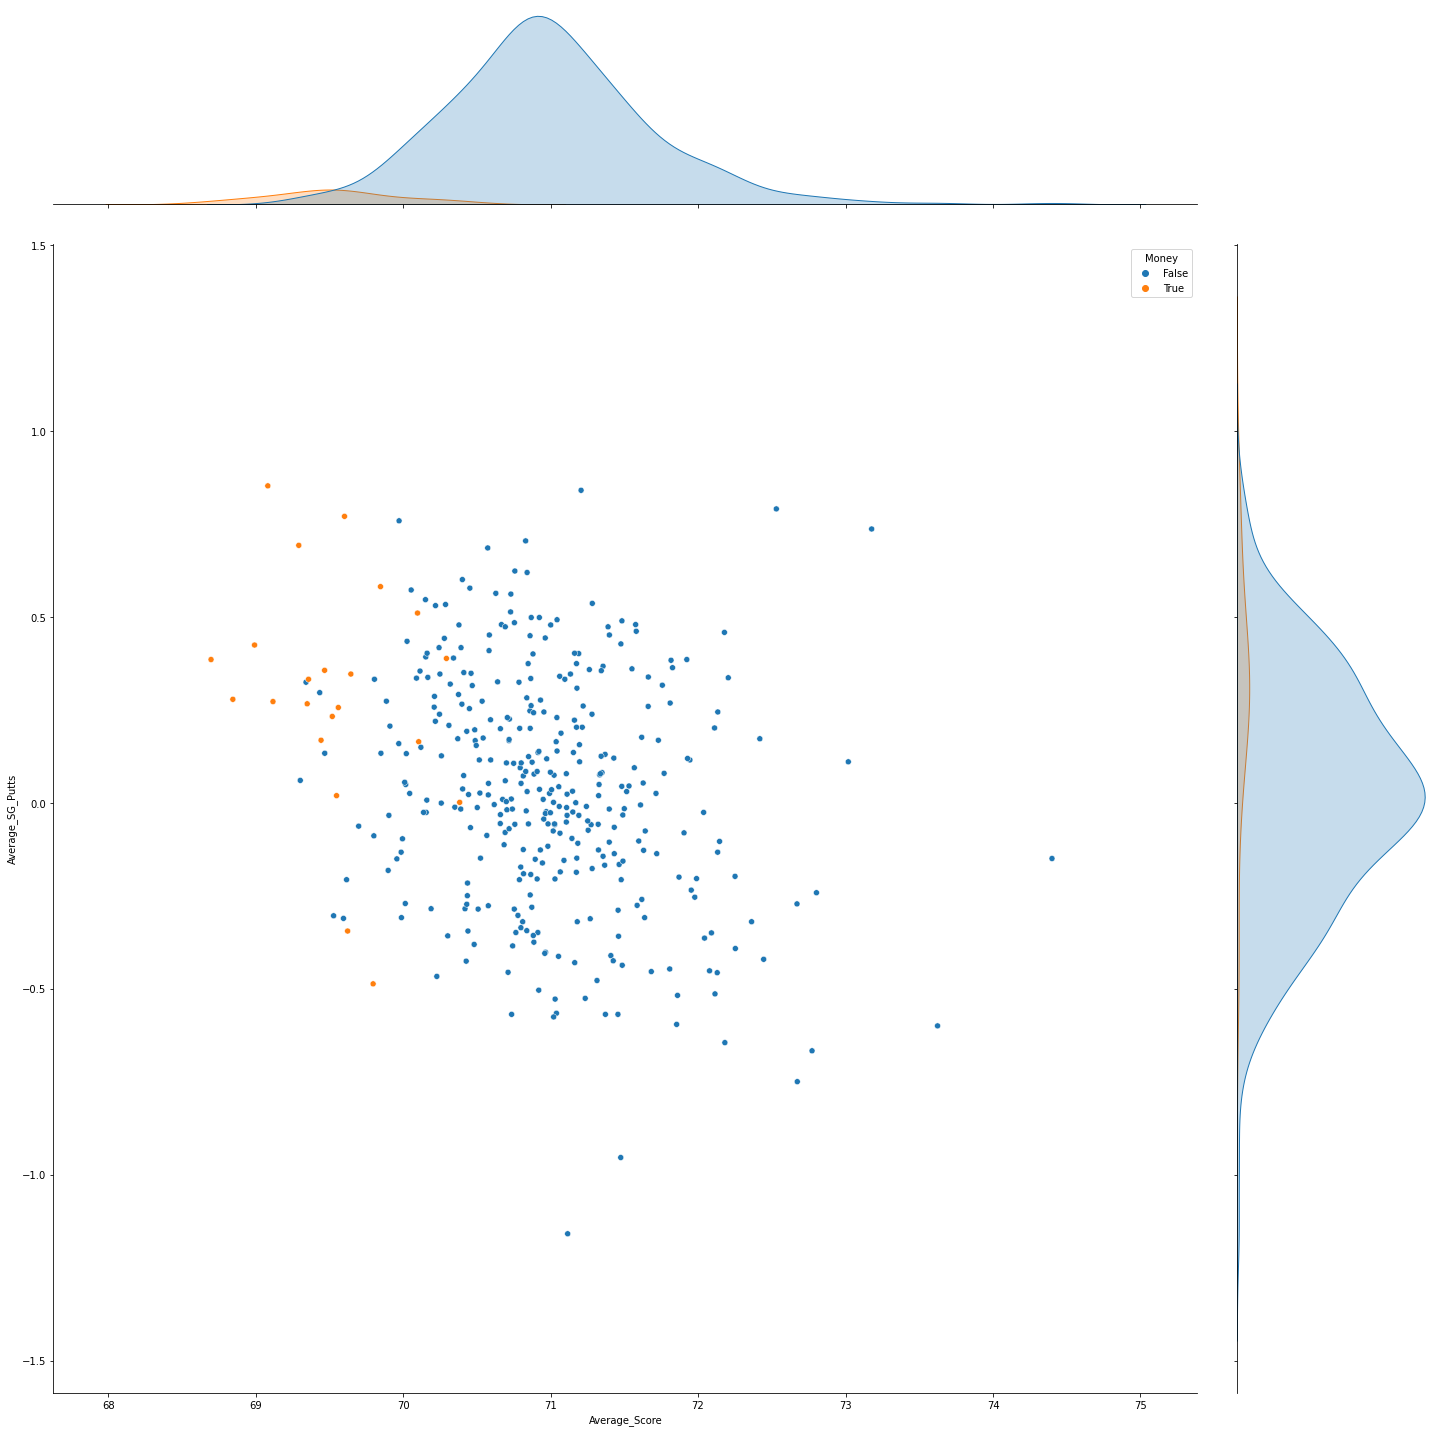

In [432]:
# Putting skills among the best players

sns.jointplot(x= df_golf.Average_Score, y= df_golf.Average_SG_Putts, hue= df_golf.Money > 4500000, height= 20)

In [409]:
# 7,8,9 & pitching irons

df_best_approachers =  df_golf[['Year', 'Player_Name', 'Wins', 'SG_APR']].copy()
df_best_approachers.sort_values(by = 'SG_APR', inplace = True, ascending = False)
df_best_approachers.head(25)

,Year,Player_Name,Wins,SG_APR
0,2018,Henrik Stenson,0,0.960
247,2017,Paul Casey,0,0.939
303,2017,Jordan Spieth,3,0.896
14,2018,Keegan Bradley,0,0.888
126,2018,Tiger Woods,0,0.883
137,2018,Justin Thomas,3,0.844
199,2017,Francesco Molinari,0,0.842
124,2018,Dustin Johnson,3,0.829
359,2017,Stewart Cink,0,0.793
323,2017,Hideki Matsuyama,3,0.758


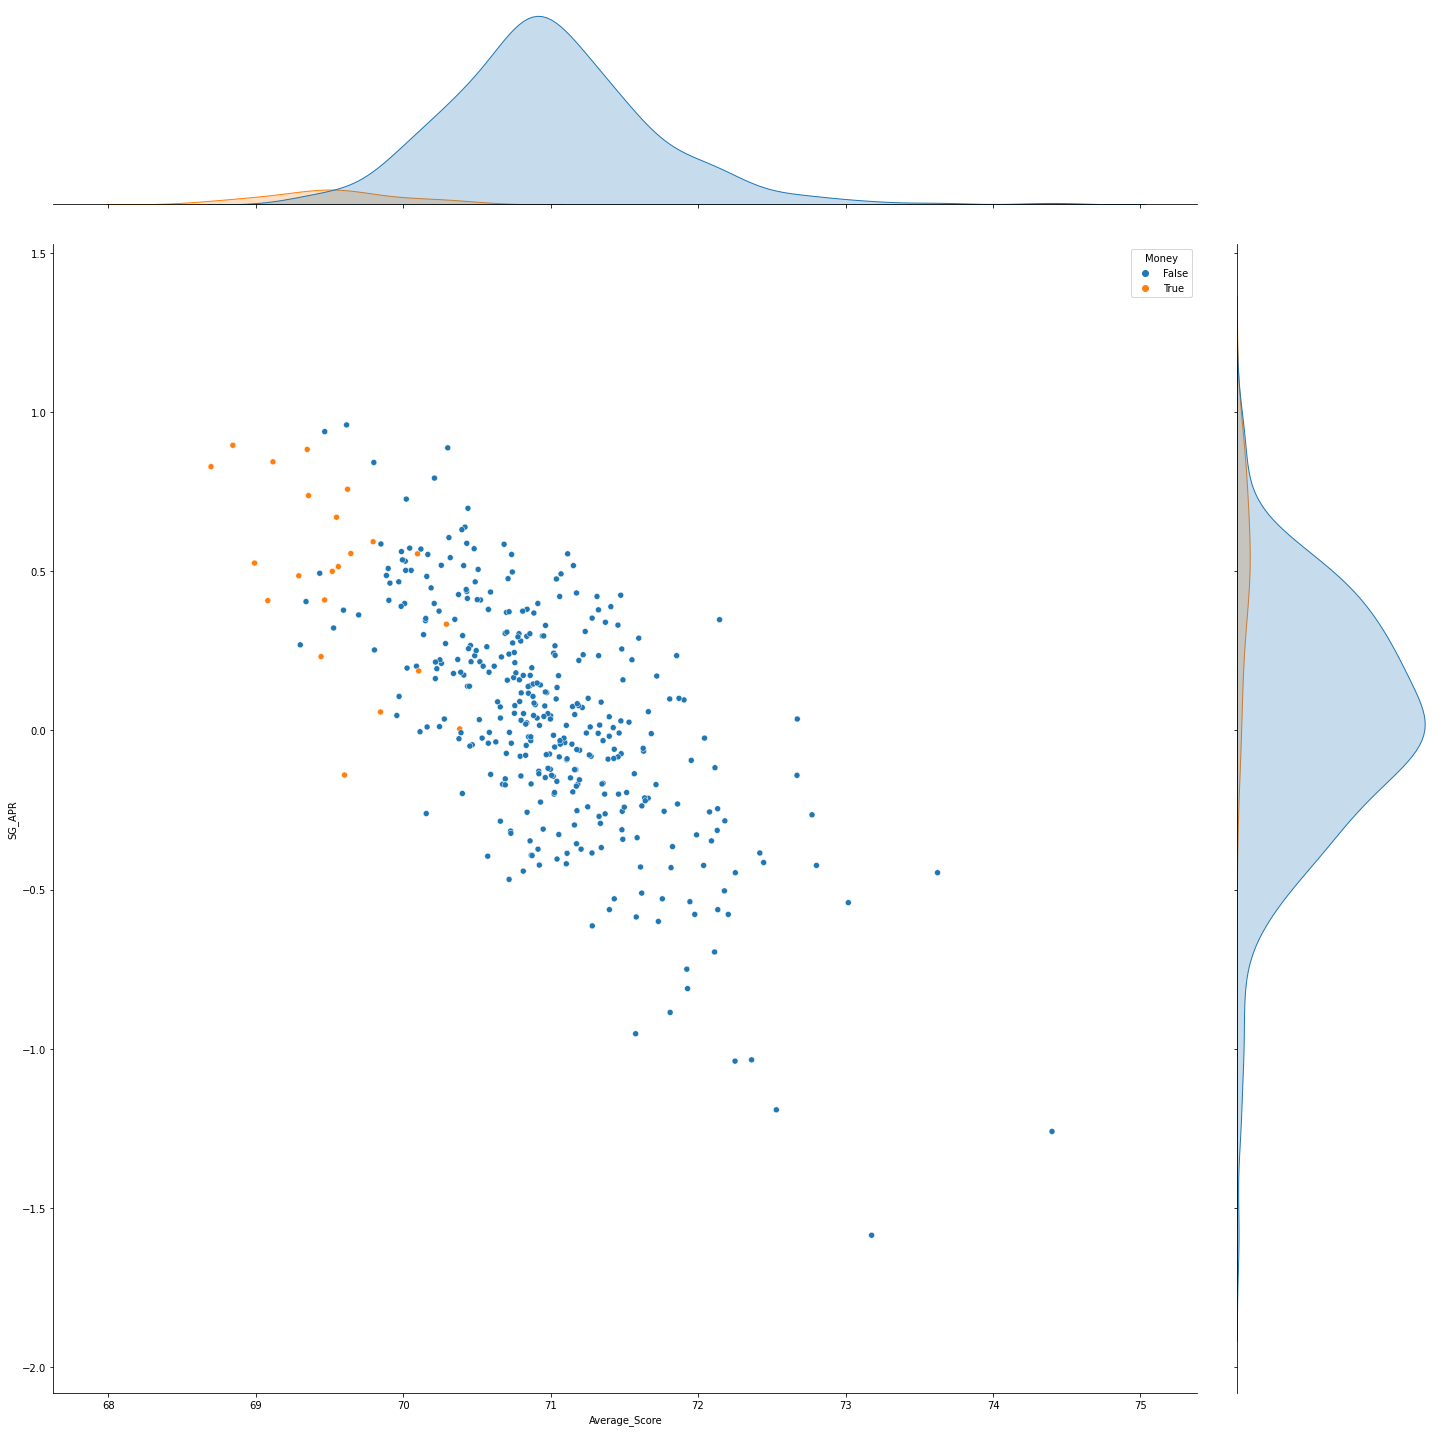

In [433]:
# Aproaching skills among the best players (7,8,9 and pitching irons)

sns.jointplot(x= df_golf.Average_Score, y= df_golf.SG_APR, hue= df_golf.Money > 4500000, height= 20)

In [410]:
# Pitch and Wedge Cracks

df_best_pw = df_golf[['Year', 'Player_Name', 'Wins', 'SG_ARG']].copy()
df_best_pw.sort_values(by = 'SG_ARG', inplace = True, ascending = False)
df_best_pw.head(25)

,Year,Player_Name,Wins,SG_ARG
185,2018,Aaron Baddeley,0,0.595
172,2018,Patrick Reed,1,0.545
225,2017,Tim Wilkinson,0,0.538
152,2018,Jamie Lovemark,0,0.519
315,2017,Bill Haas,0,0.516
328,2017,Matt Jones,0,0.503
262,2017,Ian Poulter,0,0.501
26,2018,Alex Cejka,0,0.495
140,2018,Jason Day,2,0.479
32,2018,Justin Rose,2,0.450


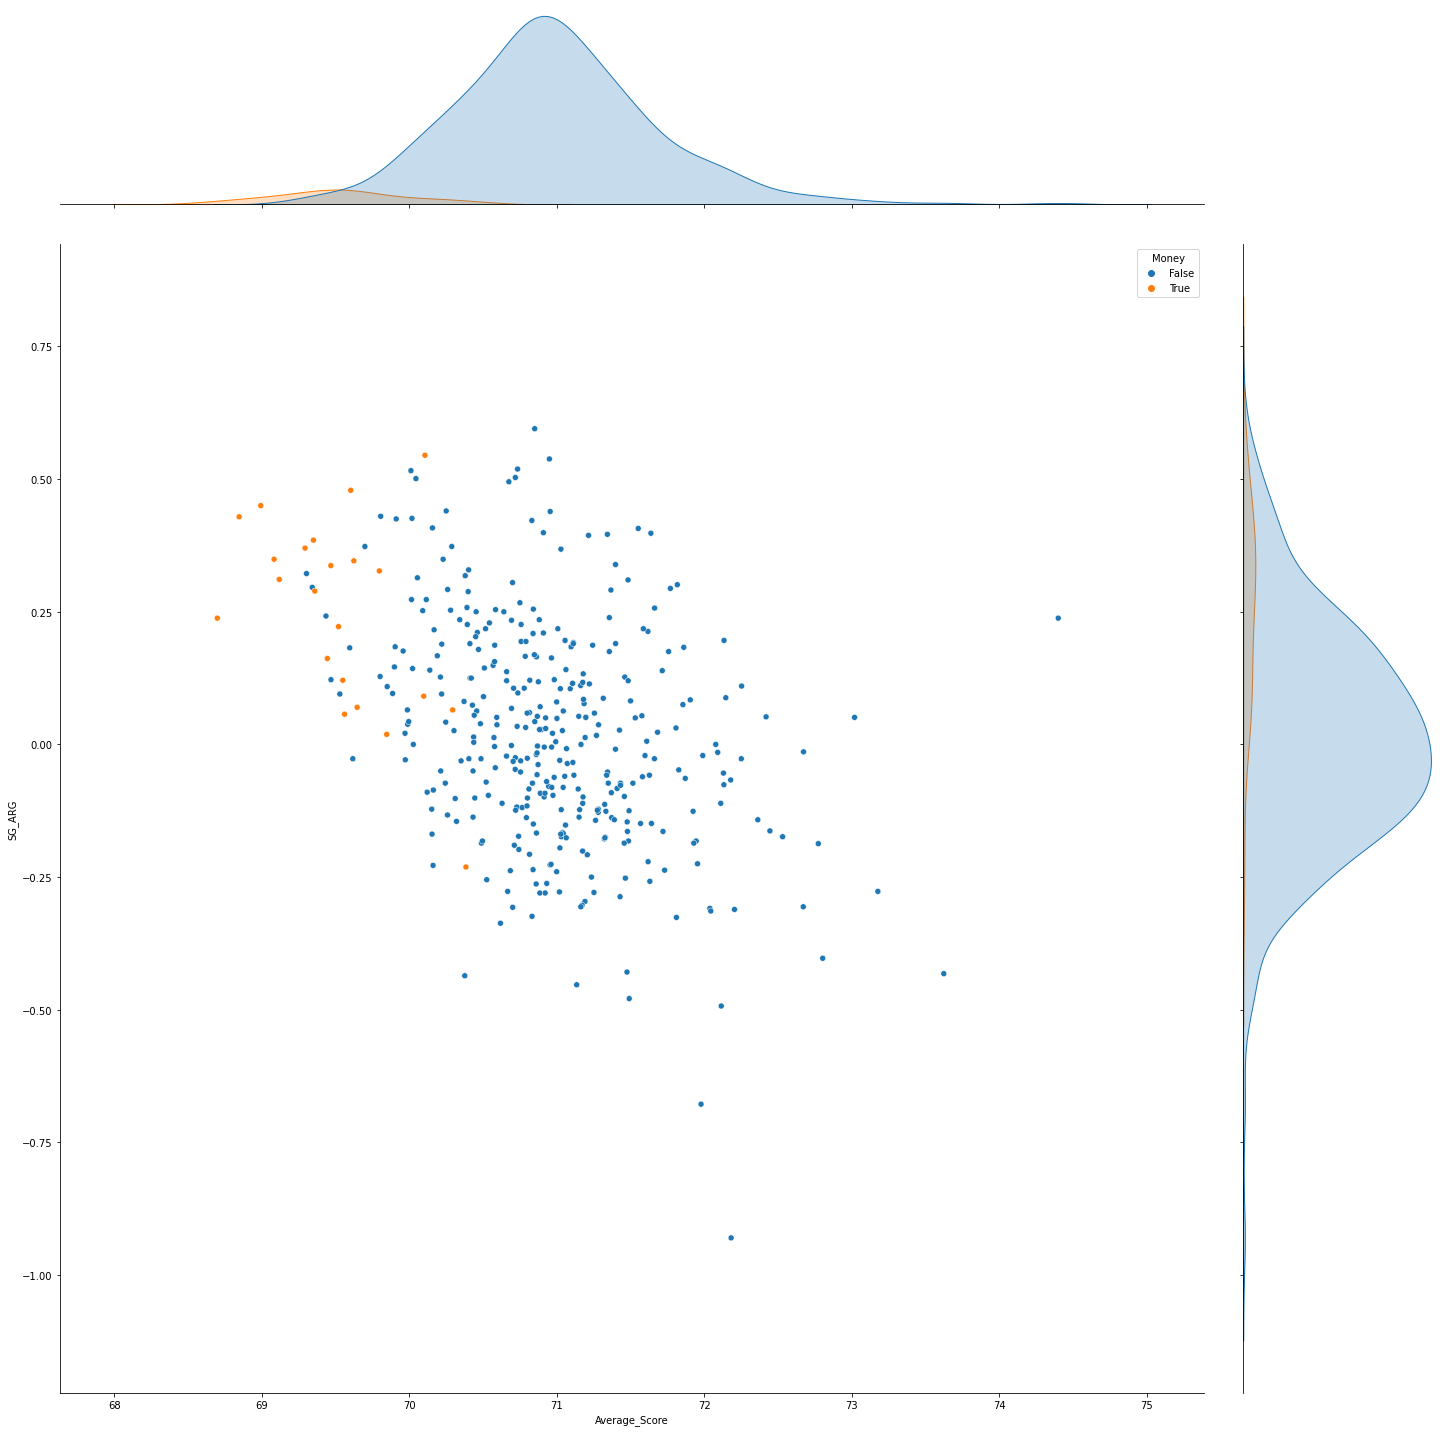

In [434]:
# Pitch and wedge cracks among the best players

sns.jointplot(x= df_golf.Average_Score, y= df_golf.SG_ARG, hue= df_golf.Money > 4500000, height= 20)

In [508]:
url = 'https://www.pgatour.com/stats/stat.120.y2020.html'

In [509]:
response = requests.get(url)

In [510]:
response.status_code

200

In [511]:
soup = BeautifulSoup(response.content)

In [521]:
player = soup.find_all('table', class_= 'table_styled')

In [522]:
player[0].find_all('tr', class_= 'odd')

IndexError: list index out of range